## Pandas

* Builds on both `numpy` and `matplotlib`
* The basis for data analysis, comparable to Excel in functionality
    * Reading and writing from `csv`, `xlsx` and SQL databases
    * Grouping, pivoting and aggregating of data
    * Data cleaning and transformations
    * Special functions for timeseries, dates, strings and other types of data
* Extended by for example `geopandas`, for working with geodata

In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
!ls ../resources/data/

leefbaarometer_2.0.csv	Open_Data_RDW__Gekentekende_voertuigen.csv
ml-1m			rdw_dates.txt


In [5]:
!head -3 ../resources/data/Open_Data_RDW__Gekentekende_voertuigen.csv

,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Datum tenaamstelling,Bruto BPM,Cilinderinhoud,Massa ledig voertuig,Toegestane maximum massa voertuig,Datum eerste toelating,Datum eerste afgifte Nederland,Catalogusprijs,WAM verzekerd
955832,93JDZG,Personenauto,DAIHATSU,SIRION,13/06/2013,2270.0,989.0,815.0,1320.0,07/03/2002,07/03/2002,,Ja
5350640,18PDJZ,Personenauto,HYUNDAI,ACCENT; 1.6,02/02/2007,3202.0,1599.0,1015.0,1555.0,06/05/2004,06/05/2004,,Ja


In [2]:
rdw = pd.read_csv('../resources/data/Open_Data_RDW__Gekentekende_voertuigen.csv')
print(rdw.shape)
rdw.sample(5)

(91135, 14)


,Unnamed: 0,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Datum tenaamstelling,Bruto BPM,Cilinderinhoud,Massa ledig voertuig,Toegestane maximum massa voertuig,Datum eerste toelating,Datum eerste afgifte Nederland,Catalogusprijs,WAM verzekerd
84339,6406347,85GNRN,Personenauto,FORD,FOCUS; 1.8I-16V-WAGON,05/10/2015,4354.0,1796.0,1144.0,1695.0,24/01/2001,24/01/2001,NaN,Ja
17991,4338201,SHSR91,Personenauto,DAEWOO,DAEWOO LEGANZA; 2.0 4DR NB,07/02/2008,4647.0,NaN,1300.0,1830.0,13/10/1997,13/10/1997,NaN,Nee
9877,1516715,XBZG46,Personenauto,SEAT,IBIZA; 1.6 / ALM 55KW,31/08/2016,2442.0,1598.0,950.0,1435.0,30/09/1998,30/09/1998,NaN,Ja
86408,7148253,XF59GJ,Personenauto,CHEVROLET,SPORTVAN K6 KAMPEERAUTO,03/09/2015,NaN,NaN,2374.0,NaN,07/04/1989,07/04/1989,NaN,Ja
69960,6663619,83XVJ1,Personenauto,MITSUBISHI,MITSUBISHI COLT,18/08/2012,3235.0,1332.0,950.0,1465.0,18/08/2012,18/08/2012,15674.0,Ja


In [7]:
rdw.dtypes

Unnamed: 0                             int64
Kenteken                              object
Voertuigsoort                         object
Merk                                  object
Handelsbenaming                       object
Datum tenaamstelling                  object
Bruto BPM                            float64
Cilinderinhoud                       float64
Massa ledig voertuig                 float64
Toegestane maximum massa voertuig    float64
Datum eerste toelating                object
Datum eerste afgifte Nederland        object
Catalogusprijs                       float64
WAM verzekerd                         object
dtype: object

(0, 4000)

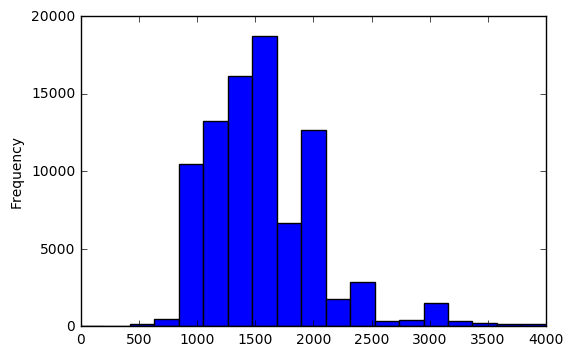

In [3]:
rdw["Cilinderinhoud"].plot.hist(bins=np.linspace(0, 4000, 20))
plt.xlim((0, 4000))

In [3]:
# seaborn is a very useful package in itself
# but it also makes our plots look a bit better

import seaborn as sns
sns.set_style('whitegrid')

(0, 4000)

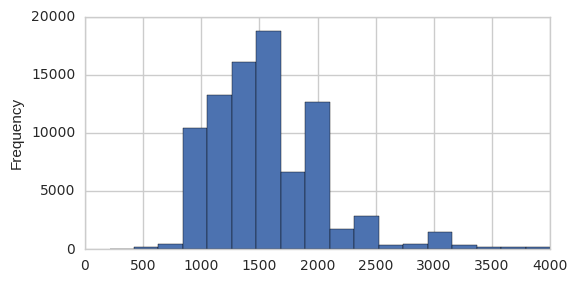

In [141]:
plt.figure(figsize=(6, 3))
rdw["Cilinderinhoud"].plot.hist(bins=np.linspace(0, 4000, 20))
plt.xlim((0, 4000))

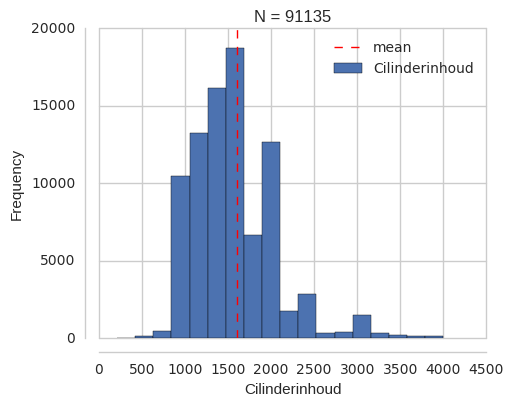

In [11]:
rdw["Cilinderinhoud"].plot.hist(bins=np.linspace(0, 4000, 20), figsize=(5, 4))

plt.xlabel("Cilinderinhoud")
plt.title("N = {}".format(rdw.shape[0]))
plt.axvline(rdw.Cilinderinhoud.mean(), ls='--', color='r', label='mean', lw=1)

sns.despine(offset=10)
plt.legend();

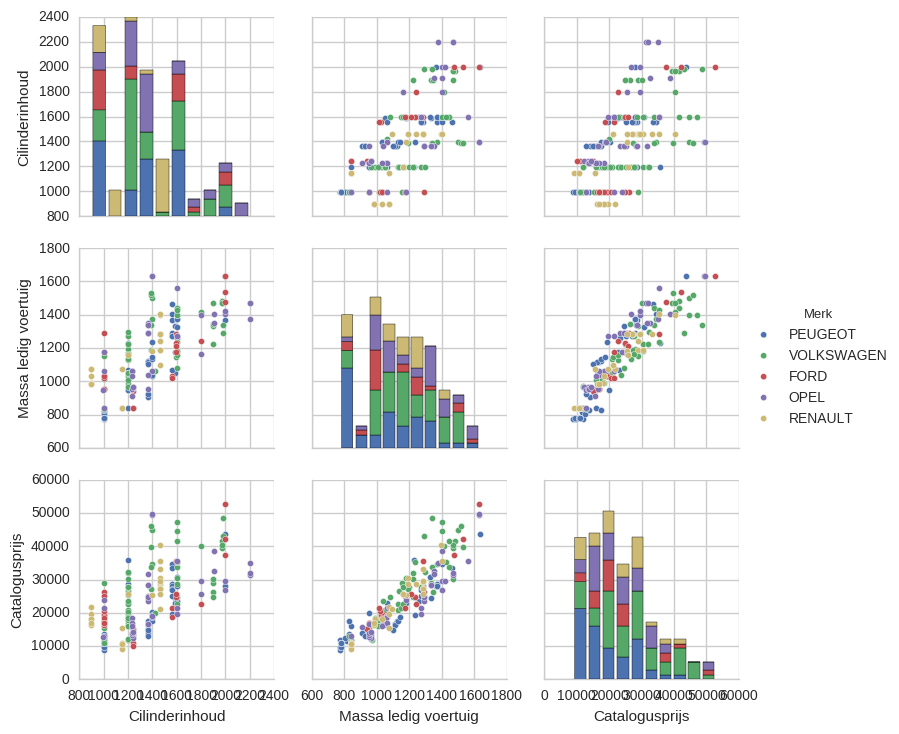

In [5]:
top = rdw.Merk.value_counts().head(5).index.values

view = rdw[["Cilinderinhoud", "Massa ledig voertuig", "Catalogusprijs", "Merk"]]
view = view[view.Merk.isin(top)].dropna().sample(200)

sns.pairplot(view, hue="Merk")

## Pandas

* The main datatypes in `pandas` are `Series` and `DataFrame`
* A `Series` is a column (or row)
* A `DataFrame` is a table

In [13]:
## simple creation of series

series = pd.Series([3, 4, 5], name='a')
series

0    3
1    4
2    5
Name: a, dtype: int64

In [14]:
series.dtype

dtype('int64')

In [15]:
series.values

array([3, 4, 5])

In [16]:
series ** 2

0     9
1    16
2    25
Name: a, dtype: int64

In [25]:
series[1]

4

In [19]:
series.index

RangeIndex(start=0, stop=3, step=1)

In [28]:
series = pd.Series([10, 4, 5], index=["A", "B", "C"], name='grade')
series

A    10
B     4
C     5
Name: grade, dtype: int64

In [29]:
series.sort_values()

B     4
C     5
A    10
Name: grade, dtype: int64

In [45]:
## create a dataframe from series

df = pd.DataFrame(series)
df

,grade
A,10
B,4
C,5


In [46]:
df["student"] = ["Q", "R", "S"]
df

,grade,student
A,10,Q
B,4,R
C,5,S


In [47]:
df.grade > 4

A     True
B    False
C     True
Name: grade, dtype: bool

In [48]:
df.index

Index(['A', 'B', 'C'], dtype='object')

In [49]:
## selecting records by index using `loc`

df.loc["A"]

grade      10
student     Q
Name: A, dtype: object

In [50]:
df.T

,A,B,C
grade,10,4,5
student,Q,R,S


In [51]:
df.mean()

grade    6.333333
dtype: float64

In [67]:
height = np.random.normal(170, 10, 80)

df = pd.DataFrame({
    "class": list("a" * 40 + "b" * 40),
    "grade": np.random.randint(4, 10, 80),
    "exam": ["math"] * 20 + ["programming"] * 20 + ["math"] * 20 + ["physics"] * 20,
    "height": height,
    "weight": ((height / 2) - 20) + np.random.normal(10, 5, 80) 
})

df.head(10)

,class,exam,grade,height,weight
0,a,math,9,158.804535,64.337681
1,a,math,9,181.098192,81.738328
2,a,math,4,157.527667,58.223040
3,a,math,9,169.079233,80.061893
4,a,math,8,181.891225,81.469594
5,a,math,8,198.250336,85.251591
6,a,math,5,177.629082,77.854321
7,a,math,7,162.599631,72.673828
8,a,math,9,175.592211,74.946071
9,a,math,4,158.540374,70.097550


In [99]:
df.grade.value_counts()

8    22
6    14
9    13
4    13
5    12
7     6
Name: grade, dtype: int64

In [101]:
df[df.exam == "math"]

,class,exam,grade,height,weight
0,a,math,9,158.804535,64.337681
1,a,math,9,181.098192,81.738328
2,a,math,4,157.527667,58.223040
3,a,math,9,169.079233,80.061893
4,a,math,8,181.891225,81.469594
5,a,math,8,198.250336,85.251591
6,a,math,5,177.629082,77.854321
7,a,math,7,162.599631,72.673828
8,a,math,9,175.592211,74.946071
9,a,math,4,158.540374,70.097550


In [68]:
df.groupby("class").mean()

,grade,height,weight
class,,,
a,6.500,170.537061,75.317734
b,6.775,170.204344,74.711978


In [103]:
df.groupby(["exam", "class"]).size()

exam         class
math         a        20
             b        20
physics      b        20
programming  a        20
dtype: int64

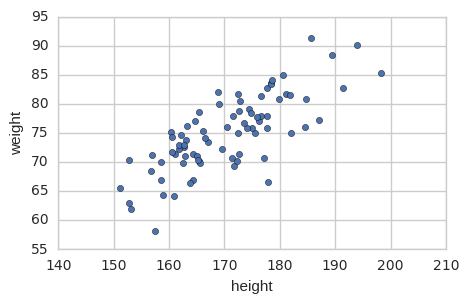

In [98]:
## plotting a frame: scatter

df.plot.scatter(x="height", y="weight", figsize=(5, 3))

## Exercises

* What is the difference in average height between the two classes?
* Calculate the number of passing grades, for each exam
* Calculate the number of passing grades for each exam and class together
* Which class scores the most grades above 8?
* Is there a correlation between grades and height?

## RDW dataset

* All registered cars in the Netherlands
    * [description]( https://www.rdw.nl/SiteCollectionDocuments/Over%20RDW/Naslagwerk/Beschrijving%20dataset%20Voertuigen%20v2.0.pdf)
* 858 Megabytes on disk as a `.csv` file

In [ ]:
## read the dataset

rdw_full = pd.read_csv('/home/gijs/Documents/datasets/Personenauto_basisdata.csv')
rdw_full.shape

In [ ]:
rdw_full.sample(5)

In [ ]:
## show top 10

rdw_full.Merk.value_counts()[:10]

In [ ]:
rdw_sample = rdw_full.sample(frac=.01)
rdw_sample.shape

In [ ]:
rdw_sample.to_csv('../resources/data/Open_Data_RDW__Gekentekende_voertuigen.csv')

In [ ]:
del rdw_full

In [105]:
rdw = pd.read_csv('../resources/data/Open_Data_RDW__Gekentekende_voertuigen.csv')

In [106]:
rdw.head(10)

,Unnamed: 0,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Datum tenaamstelling,Bruto BPM,Cilinderinhoud,Massa ledig voertuig,Toegestane maximum massa voertuig,Datum eerste toelating,Datum eerste afgifte Nederland,Catalogusprijs,WAM verzekerd
0,955832,93JDZG,Personenauto,DAIHATSU,SIRION,13/06/2013,2270.0,989.0,815.0,1320.0,07/03/2002,07/03/2002,NaN,Ja
1,5350640,18PDJZ,Personenauto,HYUNDAI,ACCENT; 1.6,02/02/2007,3202.0,1599.0,1015.0,1555.0,06/05/2004,06/05/2004,NaN,Ja
2,5172911,10TRVN,Personenauto,HYUNDAI,TUCSON,14/06/2010,5840.0,1975.0,1437.0,2050.0,06/01/2007,06/01/2007,25270.0,Ja
3,872752,04HSPX,Personenauto,OPEL,ASTRA-G-CC; Z1.6SE,28/08/2010,3609.0,1598.0,1063.0,1660.0,09/11/2001,09/11/2001,NaN,Ja
4,1150864,02RXBS,Personenauto,CITROEN,C3; 1.4I EURO IV,30/01/2009,3811.0,1360.0,989.0,1510.0,16/11/2005,16/11/2005,NaN,Ja
5,290689,98HZLL,Personenauto,CITROEN,XSARA; BERLINE 1.6I 16V,21/09/2016,3744.0,1587.0,1116.0,1663.0,01/02/2002,01/02/2002,NaN,Ja
6,7193796,XNRR63,Personenauto,FORD,FIESTA; 1.25I,24/11/2012,2401.0,1242.0,956.0,1475.0,14/01/1999,14/01/1999,NaN,Ja
7,2410430,31ZBJF,Personenauto,KIA,CEE D,04/06/2012,4162.0,1591.0,1217.0,1820.0,04/01/2008,04/01/2008,20544.0,Ja
8,7263939,TXTV05,Personenauto,VOLKSWAGEN,GOLF; 74 KW,28/03/2016,4533.0,1595.0,1092.0,1700.0,04/09/1998,04/09/1998,NaN,Ja
9,1443118,77THRL,Personenauto,MERCEDES-BENZ,190 E,27/06/2014,7952.0,1977.0,1117.0,1600.0,27/04/1983,19/09/2006,NaN,Ja


(236,)

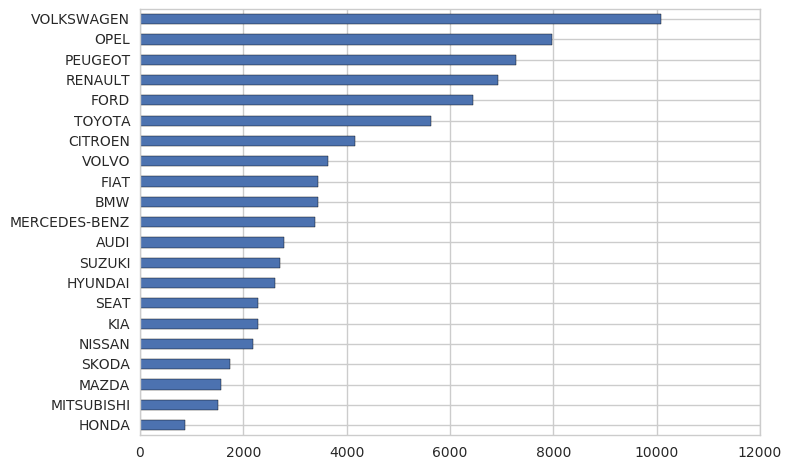

In [107]:
counts = rdw.Merk.value_counts()

counts[20::-1].plot(kind='barh')

counts.shape

In [145]:
## sorting

rdw[["Kenteken", "Merk", "Catalogusprijs", "Voertuigsoort"]].sort_values("Catalogusprijs", ascending=False).head(10)

,Kenteken,Merk,Catalogusprijs,Voertuigsoort
64939,JH238P,ROLLS ROYCE,533660.0,Personenauto
23739,8ZSG31,FERRARI,387958.0,Personenauto
18818,JK826Z,BENTLEY,381777.0,Personenauto
48592,66SXR6,ASTON-MARTIN,368898.0,Personenauto
12710,8SBD09,FERRARI,367271.0,Personenauto
88967,HG951K,MC LAREN,360556.0,Personenauto
43371,01XVK4,ASTON-MARTIN,302355.0,Personenauto
78419,KG948S,AUDI,300193.0,Personenauto
88560,5XRH73,ASTON-MARTIN,295678.0,Personenauto
61375,4SFH98,BENTLEY,291157.0,Personenauto


In [111]:
rdw.shape

(91135, 14)

In [112]:
rdw.dtypes

Unnamed: 0                             int64
Kenteken                              object
Voertuigsoort                         object
Merk                                  object
Handelsbenaming                       object
Datum tenaamstelling                  object
Bruto BPM                            float64
Cilinderinhoud                       float64
Massa ledig voertuig                 float64
Toegestane maximum massa voertuig    float64
Datum eerste toelating                object
Datum eerste afgifte Nederland        object
Catalogusprijs                       float64
WAM verzekerd                         object
dtype: object

In [115]:
pd.to_datetime(rdw["Datum eerste toelating"].head(10))

0   2002-07-03
1   2004-06-05
2   2007-06-01
3   2001-09-11
4   2005-11-16
5   2002-01-02
6   1999-01-14
7   2008-04-01
8   1998-04-09
9   1983-04-27
Name: Datum eerste toelating, dtype: datetime64[ns]

In [116]:
eerste_toelating = pd.to_datetime(rdw["Datum eerste toelating"])

In [118]:
## use .dt to get access to special datetime functions

eerste_toelating.sample(10)

3173    2006-10-05
76573   1996-03-14
53335   2008-01-17
31033   2000-03-07
75701   2008-06-03
1031    2015-11-27
60371   2012-12-01
38701   2010-06-07
54197   2015-05-27
56897   2006-04-14
Name: Datum eerste toelating, dtype: datetime64[ns]

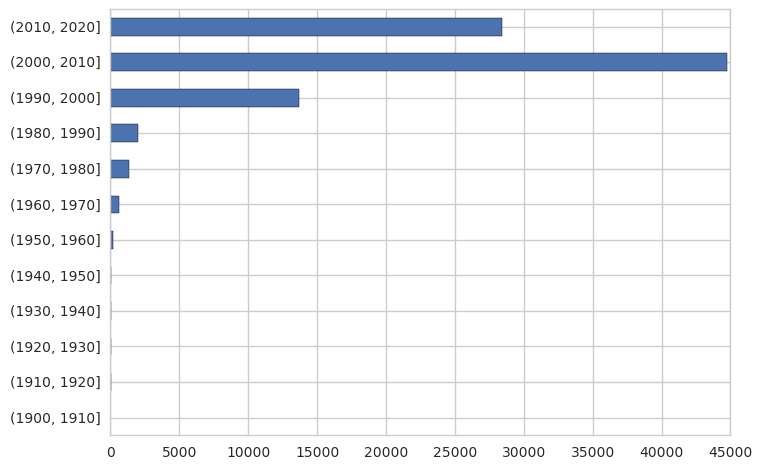

In [119]:
pd.cut(eerste_toelating.dt.year, bins=np.arange(1900, 2021, 10)).value_counts().sort_index().plot(kind='barh')

In [127]:
by_merk = rdw.dropna().groupby("Merk").mean()
by_merk.head(10)

,Unnamed: 0,Bruto BPM,Cilinderinhoud,Massa ledig voertuig,Toegestane maximum massa voertuig,Catalogusprijs
Merk,,,,,,
ADRIA,4848679,11143.285714,2239.714286,2762.714286,3471.428571,58323.857143
ADRIA MOBIL,5370607,10431.333333,2287.000000,2887.500000,3466.666667,69095.500000
ALFA ROMEO,4185859,6233.446512,1651.813953,1297.232558,1827.720930,31812.613953
ASTON-MARTIN,3976655,74882.000000,5635.000000,1821.250000,2222.250000,291703.000000
AUDI,4636246,7918.691417,1899.692098,1453.517711,2041.321526,51288.574251
BENTLEY,4454300,54770.555556,5101.555556,2388.888889,2893.555556,252187.555556
BMW,4486901,9580.472840,2154.190895,1497.913606,2078.737713,56480.339886
BMW I,3374813,361.000000,1073.000000,1375.000000,1796.250000,100617.250000
BUERSTNER,4438845,10601.400000,2358.200000,2880.500000,3500.000000,58619.400000


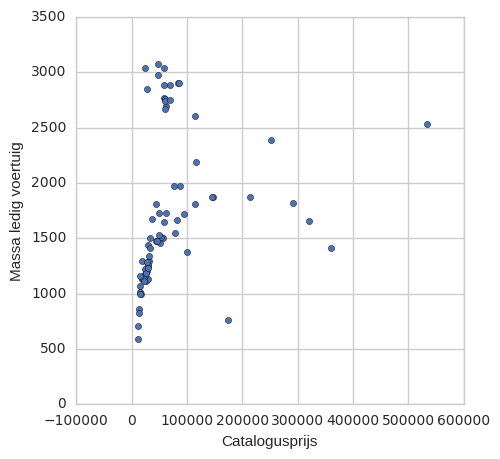

In [128]:
by_merk.plot.scatter(x="Catalogusprijs", y="Massa ledig voertuig", figsize=(5, 5))

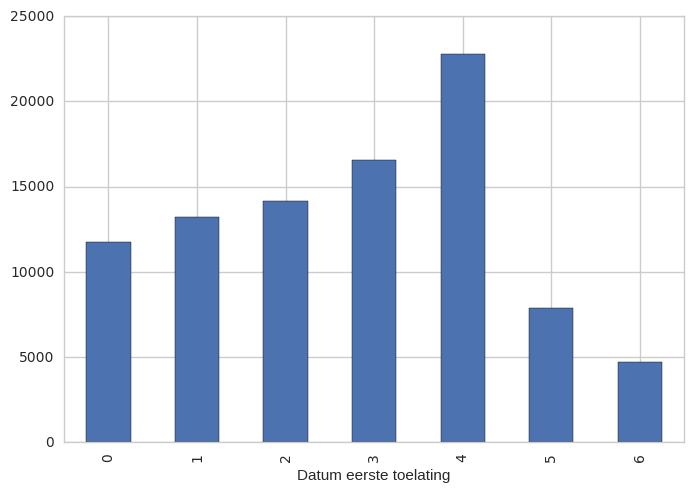

In [139]:
rdw.groupby(eerste_toelating.dt.weekday).size().plot.bar()

## Exercises

* What is the weight off all the cars combined?
* Show a top ten of the heaviest cars
* What is the cheapest brand in the set?
* Use `.plot.hist` to create a histogram on `Bruto BPM`.

Use `df[.. > ..]`

* Which brands are so heavy for their price?
* Group the dataframe by years (you need to use `.dt` on the right column and use `groupby`), take `.size` and plot a line. Sorting can be done with `.sort_index()`.
* Use the `.str.get(0)` function on the `Kenteken` column to get a count of all used first letters. 

* Python is great for data analysis!
* https://tomaugspurger.github.io/modern-1.html

![./figures/book.jpg](./figures/book.jpg)
![./figures/pydata_cover.jpg](./figures/pydata_cover_resized.jpg)

## Next time

* We leave Jupyter
* Install Git Bash
    * Clone a repository
* Install a text editor
    * Use notepad.exe
    * Or https://www.sublimetext.com/
    * Or https://atom.io/
    * Or use `emacs`